<a href="https://colab.research.google.com/github/FGalvao77/Python-Basics/blob/main/03_Aplica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 01 - Manipulação de Arquivos**

## **Arquivos em Python**

O Python possui algumas funções prontas para manipular arquivos binários puros (onde, conhecendo a estrutura interna de qualquer formato, podemos salvar qualquer tipo de arquivo) e para manipular arquivos de texto (onde os binários são decodificados como strings).

Focaremos no básico de manipulação de arquivo de texto, pois, na prática, quando formos trabalhar com arquivos mais complexos, é provável que usaremos bibliotecas específicas para lidar com eles, e elas já terão funções próprias para ler e salvar esses arquivos da maneira correta.

## **Abrindo e fechando arquivos**

Podemos criar arquivos novos ou abrir arquivos já existentes utilizando a função open. Ela possui 2 argumentos: o caminho do arquivo e o modo de operação.

***Modo             Símbolo             Descrição***

  read	            **r**	                lê um arquivo existente

  write	            **w**	                cria um novo arquivo

  append	        **a**	                abre um arquivo existente para adicionar informações ao seu final

  update	        **+**	                ao ser combinado com outros modos, permite alteração de arquivo já existente (ex: r+ abre um arquivo existente e permite modificá-lo)


Após abrirmos (ou criarmos) um arquivo, podemos realizar diversas operações. Ao final de todas elas, devemos fechar o nosso arquivo usando a função close. Essa etapa é importante por 2 motivos:

Se alteramos o arquivo mas não o fechamos, as alterações não serão salvas;
Se esquecemos de fechar um arquivo, outros programas podem ter problemas ao acessá-lo.
Roteiro básico
Vamos seguir os seguintes passos para manipular nossos arquivos:

1. Abrir ou criar um arquivo:

In [1]:
arquivocriado = open('criado.txt', 'w')
arquivocriado

<_io.TextIOWrapper name='criado.txt' mode='w' encoding='UTF-8'>

A linha de comando acima abre (ou cria se não existe) um arquivo chamado "criado.txt" para escrita ("w", de write) e guarda na variável "arquivocriado" as informações para manipulá-lo.

In [2]:
arquivolido = open('criado.txt', 'r')
arquivolido

<_io.TextIOWrapper name='criado.txt' mode='r' encoding='UTF-8'>

A linha acima lê ("r", de read) um arquivo já existente chamado "teste.txt" e guarda na variável "arquivolido" as informações para manipulá-lo.

2. Carregar os dados do arquivo (leitura)

In [3]:
dados = arquivolido.read()
print(dados)

A função read() retorna todo o conteúdo do arquivo como uma string.

Precisamos carregar o conteúdo do arquivo em algum formato que sabemos trabalhar. A read() carrega o conteúdo de um arquivo de texto em uma string.

3. Manipular os dados do arquivo (escrita)

In [4]:
arquivocriado.write('linha 1')
arquivocriado.write('linha 2')
arquivocriado.write('linha 3')

7

Em casos mais complexos, iremos manipular o conteudo LIDO no passo anterior para posteriormente reescrevê-lo. Em outros mais simples, podemos escrever diretamente no arquivo.

4. Fechar o arquivo

In [5]:
arquivocriado.close()
arquivolido.close()

Essa etapa é muito importante para garantir a integridade dos novos dados no arquivo. As modificações são salvas somente ao fechar o arquivo.


## **Comando with**

Um jeito mais inteligente de se trabalhar com arquivos é utilizar a sintaxe do "with". Ele garante que após a finalização do bloco, o arquivo será fechado.

In [6]:
arquivocriado = open('teste.txt', 'w')
arquivocriado

<_io.TextIOWrapper name='teste.txt' mode='w' encoding='UTF-8'>

In [8]:
with open('teste.txt', 'r') as arquivolido:
  dados = arquivolido.read()
  print(dados)

É possível ler o arquivo linha a linha, como no exemplo:

In [9]:
with open('teste.txt', 'r') as arquivolido:
  linha = arquivolido.readline()
  while linha != '':
    print(linha, end='')
    linha = arquivolido.readline()

In [10]:
# ou
with open('teste.txt', 'r') as arquivolido:
  for linha in arquivolido:
    print(linha, end='')

O mesmo pode ser feito para escrever no arquivo:


In [11]:
with open('teste.txt', 'r') as arquivolido:
  with open('copiateste.txt', 'w') as arquivocriado:
    for linha in arquivolido:
      arquivocriado.write(linha)

No comando acima, as linhas do arquivo "teste.txt" são copiadas e salvas no arquivo "copiateste.txt".

# **Aula 02 - Arquivos CSV**

## **CSV**

O formato CSV (Comma Separated Values, ou Valores Separados por Vírgula) é um arquivo de texto que representa dados em forma de tabela de forma simples.

Cada linha do arquivo de texto é uma linha da tabela, e as colunas são separadas por vírgulas.

1, 2, 3, 4

5, 6, 7, 8

9, 10, 11, 12

Poderíamos manipular estes arquivos diretamente usando as funções de arquivo vistas anteriormente. Um fator complicador é que o formato CSV não é bem padronizado: apesar do nome, é normal que outros separadores sejam usados ao invés de vírgula, como ";", para permitir que a vírgula seja usada em um campo. Idem para a separação entre linhas. Existe um módulo em Python para manipular arquivos CSV que nos ajuda a tratar essas diferenças. Todo programa que for utilizar o módulo CSV deverá importá-lo em seu início através do comando: import csv

In [12]:
import csv

with open('tabelaExemplo.csv', 'w') as arquivo:
  escritor = csv.writer(arquivo, delimiter = ';', lineterminator = '\n') # criando um escritor
  lista = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
  escritor.writerows(lista) # writerows escreve cada "sub-lista" da lista como uma linha

with open('tabelaExemplo.csv', "r") as arquivo:
  leitor = csv.reader(arquivo, delimiter = ';', lineterminator = '\n') # criando um leitor
  print("O conteúdo do arquivo é:")
  print(leitor)
  for linha in leitor:
    print(linha)

O conteúdo do arquivo é:
['1', '2', '3']
['4', '5', '6']
['7', '8', '9']


## **Atividade da aula**

In [15]:
# importando a biblioteca necessária
import csv

In [16]:
# importando a bases de dados para o google colab
# para isso, utilizarei a biblioteca fornecida pela google
from google.colab import files
uploaded = files.upload()

Saving brasil_covid.csv to brasil_covid.csv


In [17]:
# realizando a leitura do arquivo e visualizando
with open('brasil_covid.csv', 'r', encoding='utf-8') as arquivo_csv:
  leitor = csv.reader(arquivo_csv)
  for linha in leitor:
    print(linha)

['data', 'pais', 'novos_casos', 'novos_obitos', 'total_casos', 'total_obitos']
['2019-12-31', 'Brasil', '0', '0', '0', '0']
['2020-01-01', 'Brasil', '0', '0', '0', '0']
['2020-01-02', 'Brasil', '0', '0', '0', '0']
['2020-01-03', 'Brasil', '0', '0', '0', '0']
['2020-01-04', 'Brasil', '0', '0', '0', '0']
['2020-01-05', 'Brasil', '0', '0', '0', '0']
['2020-01-06', 'Brasil', '0', '0', '0', '0']
['2020-01-07', 'Brasil', '0', '0', '0', '0']
['2020-01-08', 'Brasil', '0', '0', '0', '0']
['2020-01-09', 'Brasil', '0', '0', '0', '0']
['2020-01-10', 'Brasil', '0', '0', '0', '0']
['2020-01-11', 'Brasil', '0', '0', '0', '0']
['2020-01-12', 'Brasil', '0', '0', '0', '0']
['2020-01-13', 'Brasil', '0', '0', '0', '0']
['2020-01-14', 'Brasil', '0', '0', '0', '0']
['2020-01-15', 'Brasil', '0', '0', '0', '0']
['2020-01-16', 'Brasil', '0', '0', '0', '0']
['2020-01-17', 'Brasil', '0', '0', '0', '0']
['2020-01-18', 'Brasil', '0', '0', '0', '0']
['2020-01-19', 'Brasil', '0', '0', '0', '0']
['2020-01-20', 'Brasi

In [19]:
# visualizando a variável "novos_casos" com valores maior que 1
# instanciando a função/método para visualizar
with open('brasil_covid.csv', 'r', encoding='utf-8') as novos_casos_maior_que_1:
  leitor = csv.reader(novos_casos_maior_que_1)
  header = next(leitor)

  for linha in leitor:
    if int (linha[2]) > 1:
      print(linha)

['2020-03-06', 'Brasil', '5', '0', '8', '0']
['2020-03-07', 'Brasil', '5', '0', '13', '0']
['2020-03-09', 'Brasil', '12', '0', '25', '0']
['2020-03-11', 'Brasil', '9', '0', '34', '0']
['2020-03-12', 'Brasil', '18', '0', '52', '0']
['2020-03-13', 'Brasil', '25', '0', '77', '0']
['2020-03-14', 'Brasil', '21', '0', '98', '0']
['2020-03-15', 'Brasil', '23', '0', '121', '0']
['2020-03-16', 'Brasil', '79', '0', '200', '0']
['2020-03-17', 'Brasil', '34', '0', '234', '0']
['2020-03-18', 'Brasil', '57', '1', '291', '1']
['2020-03-19', 'Brasil', '137', '3', '428', '4']
['2020-03-20', 'Brasil', '193', '2', '621', '6']
['2020-03-21', 'Brasil', '283', '5', '904', '11']
['2020-03-22', 'Brasil', '224', '7', '1128', '18']
['2020-03-23', 'Brasil', '418', '7', '1546', '25']
['2020-03-24', 'Brasil', '345', '9', '1891', '34']
['2020-03-25', 'Brasil', '310', '12', '2201', '46']
['2020-03-26', 'Brasil', '232', '11', '2433', '57']
['2020-03-27', 'Brasil', '482', '20', '2915', '77']
['2020-03-28', 'Brasil', '

In [21]:
# vamos realizar a leitura do arquivo sem o uso da biblioteca "csv"
# iremos somente usar codificação em Python
with open('brasil_covid.csv', 'r') as csv_file:
  linhas = csv_file.read()
  linhas = linhas.split('\n')

  for linha in linhas:
    linha = linha.split(',')
    print(linha)

['data', 'pais', 'novos_casos', 'novos_obitos', 'total_casos', 'total_obitos']
['2019-12-31', 'Brasil', '0', '0', '0', '0']
['2020-01-01', 'Brasil', '0', '0', '0', '0']
['2020-01-02', 'Brasil', '0', '0', '0', '0']
['2020-01-03', 'Brasil', '0', '0', '0', '0']
['2020-01-04', 'Brasil', '0', '0', '0', '0']
['2020-01-05', 'Brasil', '0', '0', '0', '0']
['2020-01-06', 'Brasil', '0', '0', '0', '0']
['2020-01-07', 'Brasil', '0', '0', '0', '0']
['2020-01-08', 'Brasil', '0', '0', '0', '0']
['2020-01-09', 'Brasil', '0', '0', '0', '0']
['2020-01-10', 'Brasil', '0', '0', '0', '0']
['2020-01-11', 'Brasil', '0', '0', '0', '0']
['2020-01-12', 'Brasil', '0', '0', '0', '0']
['2020-01-13', 'Brasil', '0', '0', '0', '0']
['2020-01-14', 'Brasil', '0', '0', '0', '0']
['2020-01-15', 'Brasil', '0', '0', '0', '0']
['2020-01-16', 'Brasil', '0', '0', '0', '0']
['2020-01-17', 'Brasil', '0', '0', '0', '0']
['2020-01-18', 'Brasil', '0', '0', '0', '0']
['2020-01-19', 'Brasil', '0', '0', '0', '0']
['2020-01-20', 'Brasi

In [23]:
# criando um arquivo csv e a inserção de dados
with open('users.csv', 'w', encoding='utf-8') as arquivo_users:  
  escritor = csv.writer(arquivo_users)
  escritor.writerow(['nome', 'sobrenome', 'email', 'genero'])
  escritor.writerow(['Fernando', 'Galvao', 'fernando@email.com', 'masculino'])

In [24]:
# abrindo o arquivo criado acima
with open('users.csv', 'r') as csv_file:
  linhas = csv_file.read()
  linhas = linhas.split('\n')

  for linha in linhas:
    linha = linha.split(',')
    print(linha)

['nome', 'sobrenome', 'email', 'genero']
['Fernando', 'Galvao', 'fernando@email.com', 'masculino']
['']


> **Perceba que o Python pulou a última linha.**
- podemos resolver esse problema com o parâmetro `newline=''`.

In [27]:
# criando novamente um arquivo csv e a inserção de dados
with open('users.csv', 'w', encoding='utf-8', newline='') as arquivo_users:  
  escritor = csv.writer(arquivo_users)
  escritor.writerow(['nome', 'sobrenome', 'data_nascimento', 'email', 'genero'])
  escritor.writerow(['Fernando', 'Galvao', '13/10/1977', 'fernando@email.com', 'masculino'])
  escritor.writerow(['Kátia', 'Galvao', '21/11/1980', 'katia@email.com', 'feminino'])
  escritor.writerow(['Sara', 'Galvao', '15/01/2000', 'sara@email.com', 'feminino'])
  escritor.writerow(['Eloah', 'Galvao', '22/10/2007', 'eloah@email.com', 'feminino'])

In [28]:
# abrindo o arquivo atualizado criado acima
with open('users.csv', 'r') as csv_file:
  linhas = csv_file.read()
  linhas = linhas.split('\n')

  for linha in linhas:
    linha = linha.split(',')
    print(linha)

['nome', 'sobrenome', 'data_nascimento', 'email', 'genero']
['Fernando', 'Galvao', '13/10/1977', 'fernando@email.com', 'masculino']
['Kátia', 'Galvao', '21/11/1980', 'katia@email.com', 'feminino']
['Sara', 'Galvao', '15/01/2000', 'sara@email.com', 'feminino']
['Eloah', 'Galvao', '22/10/2007', 'eloah@email.com', 'feminino']
['']


**Vamos codificar um arquivo de cadastros.**

In [39]:
# cabeçalho
header = ['nome', 'sobrenome', 'telefone', 'email']
# instanciando uma lista vazia
data = []
# comando de entrada via usuário
opt = input('O que você deseja fazer? \n1 - Cadastrar \n0 - Sair: ')

# definindo um while
while opt != '0':
  # instanciando os dados
  nome = input('\nQual seu nome?: ').title()
  sobrenome = input('Qual seu sobrenome?: ').title()
  telefone = input('Qual seu telefone?: ')
  email = input('Qual seu e-mail?: ')
  data.append([nome, sobrenome, telefone, email])
  
  # comando de entrada via usuário
  opt = input('\nO que você deseja fazer? \n1 - Cadastrar \n0 - Sair: ')

O que você deseja fazer? 
1 - Cadastrar 
0 - Sair: 1

Qual seu nome?: fernando
Qual seu sobrenome?: galvao
Qual seu telefone?: 123-456
Qual seu e-mail?: fernando@email.com

O que você deseja fazer? 
1 - Cadastrar 
0 - Sair: 1

Qual seu nome?: katia
Qual seu sobrenome?: galvao
Qual seu telefone?: 456-789
Qual seu e-mail?: katia@email.com

O que você deseja fazer? 
1 - Cadastrar 
0 - Sair: 1

Qual seu nome?: sara
Qual seu sobrenome?: galvao
Qual seu telefone?: 789-012
Qual seu e-mail?: sara@email.com

O que você deseja fazer? 
1 - Cadastrar 
0 - Sair: 0


In [40]:
# visualizando o arquivo criado
print(data)

[['Fernando', 'Galvao', '123-456', 'fernando@email.com'], ['Katia', 'Galvao', '456-789', 'katia@email.com'], ['Sara', 'Galvao', '789-012', 'sara@email.com']]


In [42]:
with open('users.csv', 'w', newline='') as arquivo_csv:
  writer = csv.writer(arquivo_csv)
  writer.writerow(header)
  writer.writerow(data)

with open('users.csv', 'r') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')

  for row in csv_reader:
    print(row)

['nome', 'sobrenome', 'telefone', 'email']
["['Fernando', 'Galvao', '123-456', 'fernando@email.com']", "['Katia', 'Galvao', '456-789', 'katia@email.com']", "['Sara', 'Galvao', '789-012', 'sara@email.com']"]


## **DictReader e DictWriter**

Podemos também trabalhar com dicionários, nos quais a primeira linha é lida como a chave e as demais são os respectivos valores:


    import csv

    with open('email.csv', 'r') as emails:
      leitor = csv.DictReader(emails, delimiter=';') # a primeira linha é lida como um cabeçalho
      for linha in leitor:
        print(linha['Login email']) # podemos chamar um valor específico de cada linha pela chave no cabeçallho


    with open('names.csv', 'w', newline='') as csvfile:
      chaves = ['first_name', 'last_name'] # definimos o cabeçalho
      writer = csv.DictWriter(csvfile, fieldnames=chaves) # especificamos o cabeçalho

      writer.writeheader() # escrevemos o cabeçalho
      writer.writerow({'first_name': 'Senhor', 'last_name': 'Batata'}) # escrevemos linhas com as chaves e valores
      writer.writerow({'first_name': 'Will', 'last_name': 'Smith'})
      writer.writerow({'first_name': 'Elon', 'last_name': 'Musk'})

# **Aula 03 - APIs**

Clique no link abaixo para acessar a documentação da Exchange Rate API.
- https://www.exchangerate-api.com/docs/free-exchange-rate-api 

## **Application Programming Interface**

Hoje em dia é muito comum que diferentes aplicações consumam dados pela internet, muitas vezes dados providenciados por terceiros. Por exemplo, um aplicativo de entrega de alimentos pode usar dados de geolocalização do Google para localizar restaurantes próximos ao usuário e exibir a rota percorrida pelo entregador.

Como as aplicações podem rodar em diferentes plataformas (Windows, Android, MacOS, iOS, um navegador de internet...), é importante estabelecer uma linguagem comum para que todos consigam consumir esses dados.

Essa "linguagem comum" é o que chamamos de API: Application Programming Interface. A organização que disponibiliza os dados estabelece algumas "regrinhas" para fazermos requisições, e em contrapartida ela garante que os recursos fornecidos também seguirão certos padrões, facilitando a vida dos programadores.

Portanto, quando decidimos utilizar uma API, a primeira coisa que precisamos fazer é estudar sua documentação. Vejamos alguns dos pontos mais relevantes para procurar.

Todos os exemplos de requisição que mostraremos aqui podem ser colados em seu navegador ou estudados usando um requests.get no Python e imprimindo seu campo text.

## **URI base**

Várias APIs fornecem um "endereço base". Todas as suas requisições incluirão esse endereço, e ao final dele nós colocamos detalhes específicos para cada um dos recursos disponíveis.

Por exemplo, na AlphaVantage (https://www.alphavantage.co/), uma API de dados de bolsas de valores e criptomoedas, a URI base é:

https://www.alphavantage.co/query?

Após a interrogação nós colocaremos os campos para nossa consulta. Por exemplo, para fazer uma consulta sem autenticação para valores da IBM, de 5 em 5 minutos, o endereço completo fica:

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo

Note o formato com &NomeDoCampo=ValorDoCampo. Ele é bastante comum. Outro formato bastante comum é o de "subdiretórios".

Um exemplo é a PokéAPI. A URI base é:

https://pokeapi.co/api/v2/

Para procurar por pokémons, adicionamos pokemon/. Em seguida, podemos colocar números (índices) ou nomes de Pokémon, como:

https://pokeapi.co/api/v2/pokemon/ditto/

https://pokeapi.co/api/v2/pokemon/25

Se ao invés de pokémons estivéssemos interessados em tipos de pokémon, usaríamos types/ e o nome ou índice do tipo desejado:

https://pokeapi.co/api/v2/type/ghost

## **Formato**

## **Tipo de dado**

Algumas APIs possuem formatos fixos de dados. Outros permitem que você escolha. É comum, por exemplo, que uma API permita que você escolha entre JSON, XML, CSV e/ou outros formatos.

Caso você tenha entrado no AlphaVantage e se registrado para obter uma chave (falaremos mais adiante), você pode especificar, por exemplo, que gostaria de resultados no formato CSV:

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&dataformat=csv&apikey=demo

Substitua "demo" por sua chave no exemplo acima e ele funcionará.

## **Schema**

É bastante comum que as APIs disponibilizem um "modelo" genérico de como será formatado o seu JSON, XML etc para que os desenvolvedores saibam quais campos esperar e quais tipos de dados serão possíveis para cada campo. Por exemplo:

    {
        'nome':string,
        'pontuacao':integer
    }

## **Autenticação**
Outro aspecto importante é a autenticação. Enquanto algumas APIs são grátis, outras são pagas. Ainda temos algumas híbridas: você pode gratuitamente acessar certos recursos, ou consumir um certo volume de dados, e acima disso você deverá pagar. Os dois modelos mais comuns de autenticação:

- Chave: ao fazer seu registro, você recebe uma chave que será inclusa na requisição, como é o caso do AlphaVantage.
- OAuth: um esquema um pouco mais complexo onde são combinados códigos de autorização, identificação do cliente e segredo do cliente em um POST, e o servidor cria uma sessão por um tempo limitado e fornece o ID da mesma. APIs de gigantes da internet (como Google e Facebook) costumam usar esse modelo.

## **Rate limiting**

Um dado parcialmente relacionado ao item anterior. As APIs costumam limitar o número de requisições que você pode fazer em um instante de tempo (3 requisições por minuto, 10000 requisições por dia etc). Temos dois motivos:

- Segurança: evitar uma sobrecarga no servidor deles que possa indisponibilizar a API para todos os usuários.
- Venda de planos: várias APIs pagas possuem diferentes planos de pagamento. Os planos mais caros costumam permitir mais requisições do que os mais baratos ou gratuitos.

## **Wrappers**

Algumas APIs possuem tantas buscas diferentes e os resultados podem ser tão complexos que mesmo vindo em formatos simples como JSON pode ser um pouco trabalhoso montar as requisições e isolar os dados que queremos. Por conta disso, frequentemente são fornecidas wrapper libraries: bibliotecas escritas em linguagens de programação específicas que já trazem classes e funções prontas para fazer requisições automaticamente e já quebrar o resultado em objetos fáceis de serem utilizados. Elas também costumam oferecer alguns benefícios adicionais, como caching: de tempos em tempos a base de dados é totalmente ou parcialmente baixada por completo e salva localmente, o que ajuda a economizar requisições e, consequentemente, uso de dados (bastante útil considerando em usuários de dispositivos móveis, por exemplo).


## **Sandbox**

Várias APIs possuem no mesmo site de sua documentação uma área conhecida como sandbox, onde você pode simular requisições no próprio navegador e ver não só a resposta formatada, como informações sobre como montar aquela requisição em software.

Aqui podemos observar a área de sandbox para fazer consultas de gastos por meio de cartão de pagamento do Portal da Transparência do governo federal. Note que ele mostra o schema e apresenta campos para preenchermos as buscas.

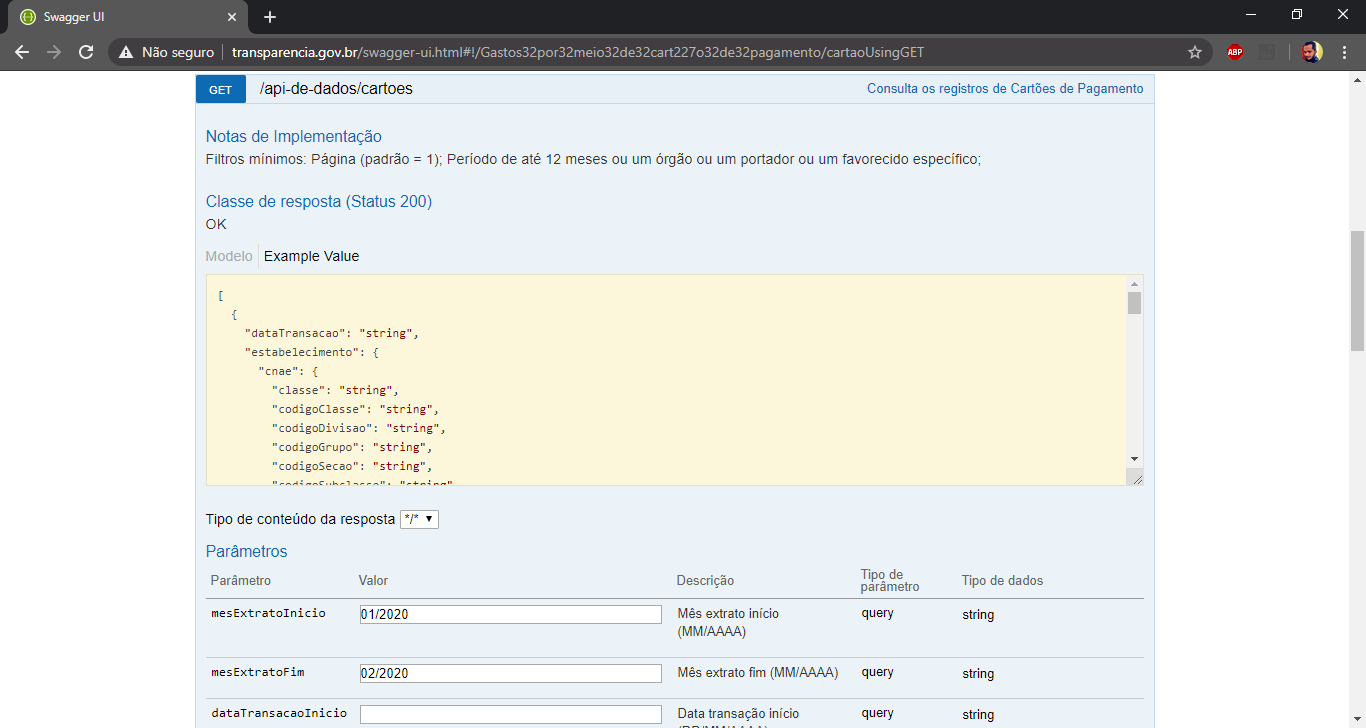

E aqui, o resultado: ele gera o endereço completo para a busca baseado nos valores preenchidos nos campos e mostra a resposta formatada.

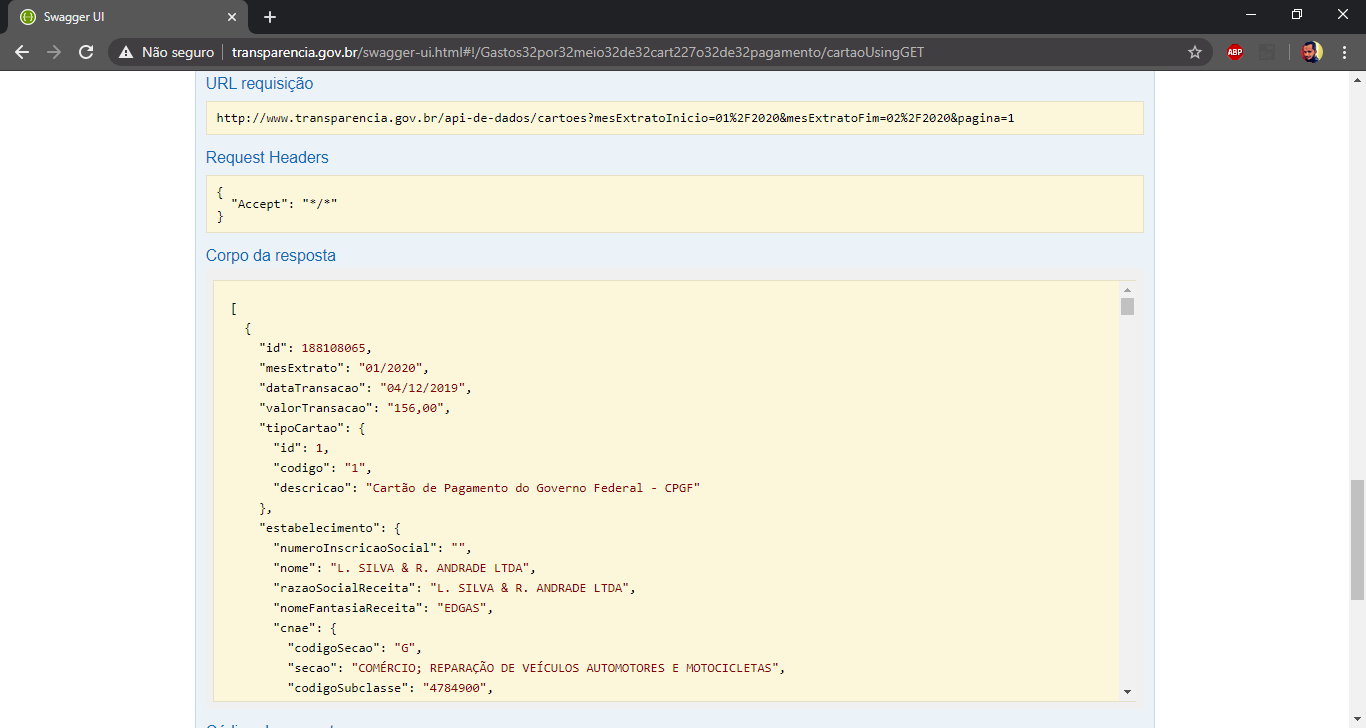

## **Consumindo APIs em Python**

As APIs são meios de nos conectarmos a recursos na internet. Portanto, já possuímos as ferramentas na mão desde os capítulos anteriores. Você irá construir a lógica para decidir o que você irá buscar/consultar, montará uma string seguindo o formato indicado pela documentação da API (como todos os exemplos deste capítulo). Em seguida você tratará a resposta de acordo:

- Se for JSON, utilize o método json da própria requests.
- Se for CSV, utilize o módulo CSV estudado anteriormente.
- Se for XML, podemos utilizar o módulo BeautifulSoup, que não será estudado aqui.
- Para outros formatos, provavelmente a solução mais fácil será baixar um módulo preparado para lidar com eles.
  
**Descobrindo APIs**: tem boas ideias e gostaria de saber se existe uma boa API para ajudar? Confira alguns bons repositórios de API organizados por categoria:

https://github.com/n0shake/public-apis

https://github.com/public-apis/public-apis

https://any-api.com/

Sites de governos costumam ter uma grande riqueza de dados também. Segue abaixo algumas sugestões (oficiais ou mantidas por voluntários) com dados do Brasil como um todo. Experimente buscar por bases de dados de sua cidade ou estado!

http://www.transparencia.gov.br/swagger-ui.html

http://www.dados.gov.br/

https://brasil.io/home/

## **Atividade da aula**

**Uso de API**

In [45]:
# instalando a biblioteca necessária para uso de API
!pip install requests

In [46]:
# importando a biblioteca
import requests

In [47]:
# instanciando url
url = 'https://api.exchangerate-api.com/v6/latest'

In [48]:
# fazendo a requisição 
requisicao = requests.get(url)

# verificando o status da url
print(requisicao.status_code)

200


In [50]:
# recuperando os dados da requisição
dados = requisicao.json()

# visualizando os dados da variável
dados

{'WARNING_NEW_ENDPOINT': 'Swap *api.exchangerate-api.com* with *open.er-api.com* for better servers!',
 'base_code': 'USD',
 'documentation': 'https://www.exchangerate-api.com/docs/free',
 'provider': 'https://www.exchangerate-api.com',
 'rates': {'AED': 3.67,
  'AFN': 79.42,
  'ALL': 102.69,
  'AMD': 495.5,
  'ANG': 1.79,
  'AOA': 650.19,
  'ARS': 95.76,
  'AUD': 1.33,
  'AWG': 1.79,
  'AZN': 1.7,
  'BAM': 1.65,
  'BBD': 2,
  'BDT': 84.62,
  'BGN': 1.65,
  'BHD': 0.376,
  'BIF': 1968.35,
  'BMD': 1,
  'BND': 1.35,
  'BOB': 6.87,
  'BRL': 5.03,
  'BSD': 1,
  'BTN': 74.62,
  'BWP': 11.01,
  'BYN': 2.54,
  'BZD': 2,
  'CAD': 1.24,
  'CDF': 1988.62,
  'CHF': 0.923,
  'CLP': 737.69,
  'CNY': 6.47,
  'COP': 3737.79,
  'CRC': 619.48,
  'CUC': 1,
  'CUP': 25.75,
  'CVE': 92.94,
  'CZK': 21.56,
  'DJF': 177.72,
  'DKK': 6.29,
  'DOP': 56.89,
  'DZD': 134.03,
  'EGP': 15.65,
  'ERN': 15,
  'ETB': 43.88,
  'EUR': 0.843,
  'FJD': 2.07,
  'FKP': 0.724,
  'FOK': 6.29,
  'GBP': 0.724,
  'GEL': 3.16,

> Veja na chave `'base_code'` e seu valor é `'USD'`.
 - que é a base monetária em dólar americano.

> E na chave `'rates'` temos valor do dólar em várias moedas mundiais.
 - perceba que temos o `BRL` - moeda brasileira.

In [56]:
valor_reais = float (input('Informe o valor em R$ a ser convertido: '))
cotacao = dados['rates']['BRL']

print(f'\nR$ {valor_reais} em dólar valem US$ {(valor_reais / cotacao):.2f}')

Informe o valor em R$ a ser convertido: 100

R$ 100.0 em dólar valem US$ 19.88


# **Aula 04 - Projeto | Parte 1**

## **Datetime**

Para treinar o uso da biblioteca datetime, execute as funções do código a seguir, tentando prever os seus resultados:

In [ ]:
import datetime

d = datetime.date(2001, 9, 11)
tday = datetime.date.today()
print(tday, d)


# datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)

2021-07-04 2001-09-11


In [ ]:
tdelta = datetime.timedelta(hours=12)
print(tday + tdelta)

2021-07-04


In [ ]:
bday = datetime.date(2016, 9, 24)
till_bday = bday - tday
print(till_bday.days)

-1744


In [ ]:
dt_agora = datetime.datetime.now()
print(dt_agora.strftime('%B %d, %Y'))

July 04, 2021


In [ ]:
dt_str = 'July 24, 2016'
dt = datetime.datetime.strptime(dt_str, '%B %d, %Y')
print(dt)

# strftime - Datetime para String
# strptime - String para Datetime

2016-07-24 00:00:00


## **Atividade da aula**

### **PROJETO FINAL - Parte 1**

In [1]:
# importando a biblioteca
import requests as r

In [2]:
# instanciando a url
url = 'https://api.covid19api.com/dayone/country/brazil'

# resultado da requisição instanciando na variável "resposta"
resposta = r.get(url)

In [3]:
# verificando o status da requisição
resposta.status_code

200

In [4]:
# instanciando a resposta da requisição na variável "raw_data"
raw_data = resposta.json() # "json" formato do tipo de dado da api

# visualizando a posição zero (0)
raw_data[0]

{'Active': 1,
 'City': '',
 'CityCode': '',
 'Confirmed': 1,
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Date': '2020-02-26T00:00:00Z',
 'Deaths': 0,
 'ID': '5b679794-2952-4c4c-a873-af6ff457b0fd',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Province': '',
 'Recovered': 0}

In [5]:
# visualizando as 5 primeiras posições
raw_data[:4]

[{'Active': 1,
  'City': '',
  'CityCode': '',
  'Confirmed': 1,
  'Country': 'Brazil',
  'CountryCode': 'BR',
  'Date': '2020-02-26T00:00:00Z',
  'Deaths': 0,
  'ID': '5b679794-2952-4c4c-a873-af6ff457b0fd',
  'Lat': '-14.24',
  'Lon': '-51.93',
  'Province': '',
  'Recovered': 0},
 {'Active': 1,
  'City': '',
  'CityCode': '',
  'Confirmed': 1,
  'Country': 'Brazil',
  'CountryCode': 'BR',
  'Date': '2020-02-27T00:00:00Z',
  'Deaths': 0,
  'ID': 'a832f928-7fc5-4b87-9f25-240412f6ac82',
  'Lat': '-14.24',
  'Lon': '-51.93',
  'Province': '',
  'Recovered': 0},
 {'Active': 1,
  'City': '',
  'CityCode': '',
  'Confirmed': 1,
  'Country': 'Brazil',
  'CountryCode': 'BR',
  'Date': '2020-02-28T00:00:00Z',
  'Deaths': 0,
  'ID': '540e68fd-caf1-4f49-98e0-da00dc785621',
  'Lat': '-14.24',
  'Lon': '-51.93',
  'Province': '',
  'Recovered': 0},
 {'Active': 2,
  'City': '',
  'CityCode': '',
  'Confirmed': 2,
  'Country': 'Brazil',
  'CountryCode': 'BR',
  'Date': '2020-02-29T00:00:00Z',
  'Dea

In [6]:
# filtrando as features que precisamos
final_data = []

for obs in raw_data:
  final_data.append([obs['Confirmed'],
                    obs['Deaths'],
                    obs['Recovered'],
                    obs['Active'],
                    obs['Date']])

In [7]:
# visualizando a seleção das features
final_data

[[1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-06T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-07T00:00:00Z'],
 [20, 0, 0, 20, '2020-03-08T00:00:00Z'],
 [25, 0, 0, 25, '2020-03-09T00:00:00Z'],
 [31, 0, 0, 31, '2020-03-10T00:00:00Z'],
 [38, 0, 0, 38, '2020-03-11T00:00:00Z'],
 [52, 0, 0, 52, '2020-03-12T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-13T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-14T00:00:00Z'],
 [162, 0, 0, 162, '2020-03-15T00:00:00Z'],
 [200, 0, 1, 199, '2020-03-16T00:00:00Z'],
 [321, 1, 2, 318, '2020-03-17T00:00:00Z'],
 [372, 3, 2, 367, '2020-03-18T00:00:00Z'],
 [621, 6, 2, 613, '2020-03-19T00:00:00Z'],
 [793, 11, 2, 780, '2020-03-20T00:00:00Z'],
 [1021, 15, 2, 10

In [8]:
# vamos instanciar um cabeçalho para as features selecioanadas 
final_data.insert(0, ['confirmados', 'obitos', 
                      'recuperados', 'ativos', 'data'])

# visualizando a seleção com o headers
final_data

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-06T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-07T00:00:00Z'],
 [20, 0, 0, 20, '2020-03-08T00:00:00Z'],
 [25, 0, 0, 25, '2020-03-09T00:00:00Z'],
 [31, 0, 0, 31, '2020-03-10T00:00:00Z'],
 [38, 0, 0, 38, '2020-03-11T00:00:00Z'],
 [52, 0, 0, 52, '2020-03-12T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-13T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-14T00:00:00Z'],
 [162, 0, 0, 162, '2020-03-15T00:00:00Z'],
 [200, 0, 1, 199, '2020-03-16T00:00:00Z'],
 [321, 1, 2, 318, '2020-03-17T00:00:00Z'],
 [372, 3, 2, 367, '2020-03-18T00:00:00Z'],
 [621, 6, 2, 613, '2020-03-19T00:00:00Z'],


In [9]:
# referenciando variáveis com valor constante para facilitar o tratamento dos dados
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [10]:
# realizando um "for" para tratar o formato da data
for i in range(1, len(final_data)):
  final_data[i][DATA] = final_data[i][DATA][:10]

In [11]:
# visualizando nossa seleção depois de formatar a feature "data"
final_data

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, '2020-02-26'],
 [1, 0, 0, 1, '2020-02-27'],
 [1, 0, 0, 1, '2020-02-28'],
 [2, 0, 0, 2, '2020-02-29'],
 [2, 0, 0, 2, '2020-03-01'],
 [2, 0, 0, 2, '2020-03-02'],
 [2, 0, 0, 2, '2020-03-03'],
 [4, 0, 0, 4, '2020-03-04'],
 [4, 0, 0, 4, '2020-03-05'],
 [13, 0, 0, 13, '2020-03-06'],
 [13, 0, 0, 13, '2020-03-07'],
 [20, 0, 0, 20, '2020-03-08'],
 [25, 0, 0, 25, '2020-03-09'],
 [31, 0, 0, 31, '2020-03-10'],
 [38, 0, 0, 38, '2020-03-11'],
 [52, 0, 0, 52, '2020-03-12'],
 [151, 0, 0, 151, '2020-03-13'],
 [151, 0, 0, 151, '2020-03-14'],
 [162, 0, 0, 162, '2020-03-15'],
 [200, 0, 1, 199, '2020-03-16'],
 [321, 1, 2, 318, '2020-03-17'],
 [372, 3, 2, 367, '2020-03-18'],
 [621, 6, 2, 613, '2020-03-19'],
 [793, 11, 2, 780, '2020-03-20'],
 [1021, 15, 2, 1004, '2020-03-21'],
 [1546, 25, 2, 1519, '2020-03-22'],
 [1924, 34, 2, 1888, '2020-03-23'],
 [2247, 46, 2, 2199, '2020-03-24'],
 [2554, 59, 2, 2493, '2020-03-25'],
 [2985, 77, 6, 2

> Perceba que, a data está em formato de string.
  - portanto teremos que transforma-la em formato de data para seja possível realizar manipulações com a mesma.

In [12]:
# importando a biblioteca 
import datetime as dt

**Vamos conhecer as funções da biblioteca** `datetime`.

In [13]:
print(dt.time(12, 6, 21, 7), 'Hora:minuto:segundo.microsegundo')
print('----')
print(dt.date(2020, 4, 25), 'Ano-mês-dia')
print('----')
print(dt.datetime(2020, 4, 25, 12, 6, 21, 7), 'Ano-mês-dia Hora:minuto:segundo.microsegundo')

12:06:21.000007 Hora:minuto:segundo.microsegundo
----
2020-04-25 Ano-mês-dia
----
2020-04-25 12:06:21.000007 Ano-mês-dia Hora:minuto:segundo.microsegundo


**Podemos realizar operações com as datas**.

In [14]:
natal = dt.date(2020, 12, 25)
reveillon = dt.date(2021, 1, 1)

print(reveillon - natal)
print((reveillon - natal).days)
print((reveillon - natal).seconds)
print((reveillon - natal).microseconds)

7 days, 0:00:00
7
0
0


**Vamos guardar nosso arquivo selecionado em dataframe.**
 - para podemos trabalhar futuramente com o arrquivo.

In [15]:
# importando a biblioteca
import csv

In [16]:
# instanciando o arquivo selecionado na variável "final_data"
with open('brasil-covid.csv', 'w') as file:
  writer = csv.writer(file)
  writer.writerows(final_data)

**Agora vamos tratar a feature** `data` **e tranforma o tipo de dado de string para o formato realmente de data.**

In [17]:
# vamos realizar um "for" para percorrer nosso arquivo na feature "data" e realizar a trnsformação
for i in range(1, len(final_data)):
  final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], 
                                             '%Y-%m-%d')

In [18]:
# visualizando novamente o arquivo e conferindo a transformação
final_data

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)],
 [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)],
 [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)],
 [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)],
 [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)],
 [151, 0, 0, 151, datetime.da

### **PROJETO FINAL - Parte 2**

In [19]:
# criando uma função para receber o dados do eixo y
def get_datasets(y, labels):
  if type (y[0]) == list:
    datasets = []

    for i in range(len(y)):
      datasets.append({
          'label': labels[i],
          'data': y[i]
      })

    return datasets

  else:
    return [
            {
                'label': labels[0],
                'data': y
             }
            ]

In [20]:
# criando uma função para setar um título
def set_title(title=''):

  if title != '':
    display = 'true'
  else:
    display = 'false'

  return {
      'title': title,
      'display': display
  }

In [21]:
# criando uma função para representar o gráfico
# nesse caso, iremos utilizar gráfico de barras
def create_chart(x,y, labels, kind='bar', title=''):

  datasets = get_datasets(y, labels)
  options = set_title(title)

  chart = {
      'type': kind,
      'data': {
          'labels': x,
          'datasets': datasets
      },
      'options': options
  }

  return chart

In [22]:
# criando uma função para realizar a requisição no API
def get_api_chart(chart):
  url_base = 'https://quickchart.io/chart'
  resposta = r.get(f'{url_base}?c={str (chart)}')
  return resposta.content

In [23]:
# criando uma função para salvar a imagem gerada
def save_image(path, content):
  with open(path, 'wb') as image:
    image.write(content)

In [24]:
# importando as bibliotecas necessárias
from PIL import Image
from IPython.display import display

In [25]:
# criando uma função para abrir a imagem gerada
def display_image(path):
  img_pil = Image.open(path)
  display(img_pil)

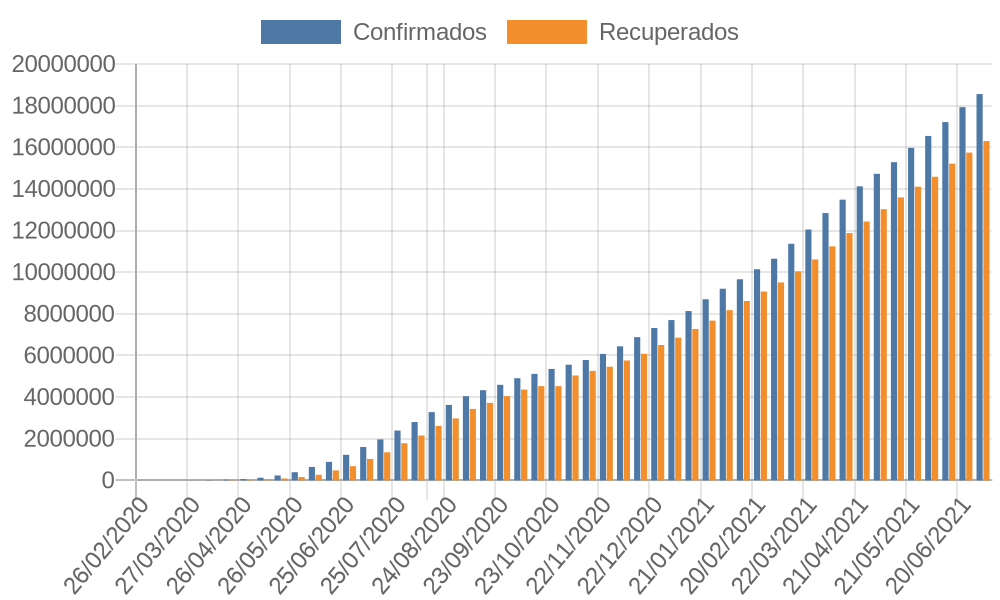

In [26]:
# instanciando os dados e as funções para gerar o nosso gráfico de barras
y_data_1 = []
for obs in final_data[1::10]:
  y_data_1.append(obs[CONFIRMADOS])

y_data_2 = []
for obs in final_data[1::10]:
  y_data_2.append(obs[RECUPERADOS])

labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::10]:
  x.append(obs[DATA].strftime('%d/%m/%Y'))

chart = create_chart(x, [y_data_1, y_data_2], labels,
                     title='Gráfico confirmados VS recuperados')

chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')

**A biblioteca do** `quickchart` **permite a geração de** `QRCode` **do criado gráfico**.
 - agora vamos explorar essa possiblidades.

In [28]:
# importando a biblioteca para auxiliar a geração do QRCode
from urllib.parse import quote

In [29]:
# criando a função para gerar o QRCode
def get_api_qrcode(link):
  text = quote(link) # parsing do link para url
  url_base = 'https://quickchart.io/qr'
  resposta = r.get(f'{url_base}?text={text}')
  return resposta.content

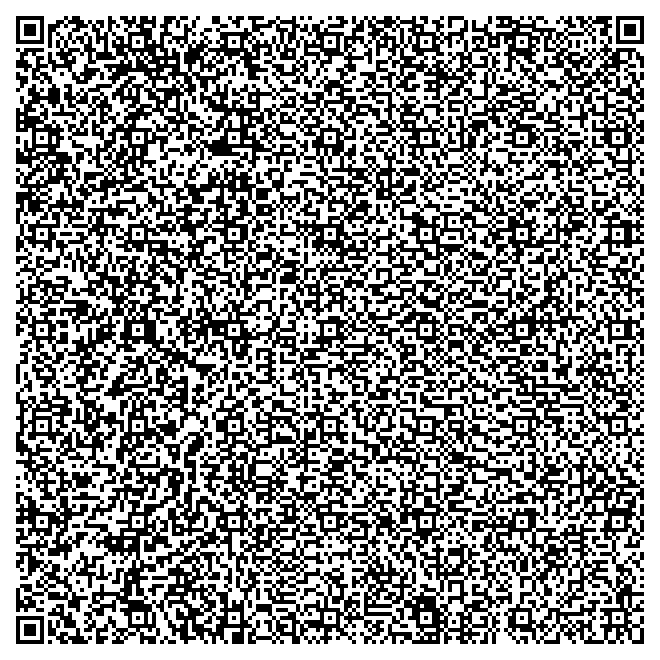

In [30]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str (chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')